In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import math

import plotly.express as px

import pandas_datareader.data as web

from keras.callbacks import EarlyStopping

import keras
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.metrics import mean_squared_error

## Introduction
Technical analysis is a trading discipline used to evaluate investments and identify trading opportunities in price trends and patterns from graphs.  Technical analysts believe past trading activity and price changes of a stock can be indicators of the security's future price movements.  The difference between 
technical analysis and fundamental analysis is that fundamental analyats focuses on a company's financials rather than historical price patterns or stock trends.  https://www.investopedia.com/terms/t/technicalanalysis.asp
This notebook will demonstrate how to perform a very basic technical analysis of stock prices using Python code.  I will provide analysis and insights of stock prices that can be obtained from historical stock data and corresponding graphs.  In addition, this notebook will demonstrate how algorithmic trading can be used to predict stock prices and how technical indicators can used in LTSM models.  <br>
I obtained historical stock data by using the Pandas library DataReader.  The library provides price and volumne information regarding stocks. I will use mainly the Closing Pricefrom the datasets.<br>
I will use Long Short Term Memory (LSTM ) and SARIMA models to forecast the next day stock price.  I will use  metrics to measure the performance of the models at predicting stock prices.  
My analysis will focus on the following pharmaceutical companies that are developing a COVID-19 vaccine: 
* Pfizer(PFE),
* Johnson & Johnson(JNJ)
* Moderna (MRNA)
* Novavax (NVAX) 
* BioNTech SE(BNTX)
* MERCK & Co.(MRK)

My analysis will focus on answering the following questions regarding the trends  and performance of the above stocks:
### Question 1: 
Can technical indicators alone provide an investor or trader with information to make a decision of when to buy and sell stocks?<br>
**Answer:** Investment decisions are very complicted and require knowledge and consideration of many variables which are beyond the scope of this notebook.  However, technical indicators are tools used by investors and traders to gain insights regarding the stock's history, volatility, trends and the direction the price may be headed.  This historical price analysis will hopefully provide you with some insights regarding volatility and trends of the stock.  I will use Moving Averages, prices changes and MACD to analyze price trends.   question to consider is what type of investment is being sought?  Are you looking for short investments with high returns or long term investment with consistent returns.<br>
**Model 1**  

### Question 2:
How well can historical data  and algorithms predict future stocks prices?  I will contrast the performance of predictions of LSTM models and LTSM models with technical indicators.  Is there a difference in the RMSE metrics when comparing models?<br>
**Model 1** I will use a LTSM Neural Network to make a price prediction with only historical price data.<br>
**Model 2** LTSM model with technical indicators to predict and graph future stock prices.<br>
### Question 3:
Which trading algorithms LTSM or ARIMA performs better at predicting stocks prices?  
**Model 1** is an ARIMA model.<br>
### Question 4:
Is there a relationship between tweets put out by the pharmaceutical companies and the fluctuation in their stock prices.<br>




## Get the Historical Stock Data

### Multiple Stocks Data

In [43]:
from datetime import date
today = date.today()
def multiple_stock_data(ticker=None, start=None, end=None, plot=True, stock_value=None):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
        df_1 = pd.DataFrame(data)#.reset_index()
        if plot==True:
            df_1.plot(figsize=(12,8))
            plt.title("HistoricL Stock Adjusted Price Data")
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


In [44]:
# multi_stock_data = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2017',end='today',plot=True, stock_value='Adj Close')
# multi_stock_data;

In [45]:
#multi_stock_data.to_csv('multi_pharm_data')

In [46]:
#start='2017',end='today'
multi_stocks = pd.read_csv('multi_pharm_data', parse_dates=True, index_col='Date')
#multi_stocks

In [47]:
def get_multi_plot(df, stock_value=None):
    #plt.figure(figsize=(12,8))
    df.plot(figsize=(12,8))
    label_font = {'weight':'bold','size':18}
    plt.xlabel('Date',fontdict=label_font)
    plt.ylabel('Close Price USD ($)',fontdict=label_font)
    plt.title(f'Historical {stock_value} Price',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
    return df
    

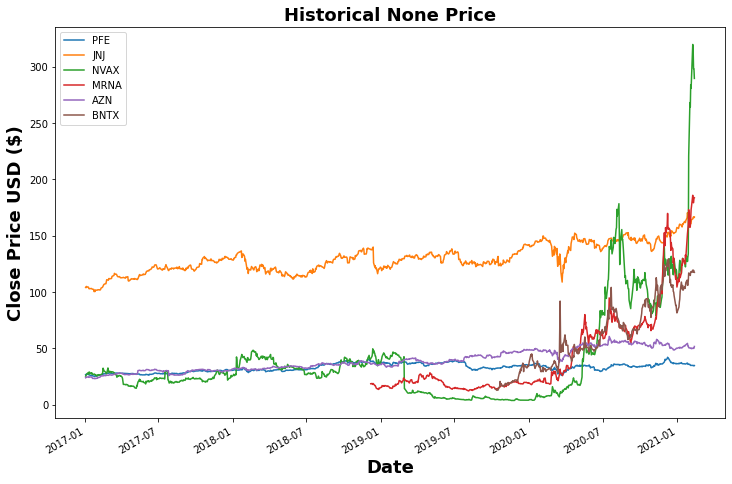

In [48]:
multi_pharma_stocks = get_multi_plot(multi_stocks)

In [49]:
multi_pharma_stocks.describe()

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
count,1036.000000,1036.000000,1036.000000,550.000000,1036.000000,339.000000
mean,32.843897,129.876974,39.271390,45.232354,39.116489,61.476607
std,3.712987,12.935817,43.733490,39.895802,9.294169,30.586377
min,25.159119,100.415688,3.690000,12.260000,23.033178,12.750000
25%,29.990926,120.960293,11.950000,17.505000,31.333721,34.940001
50%,32.962477,128.668221,26.799999,23.080000,36.842728,55.000000
75%,36.120962,138.669872,41.799999,67.045002,47.416969,86.445000
max,42.101986,170.479996,319.929993,185.979996,60.615417,129.539993


### Single Stock Data

In [50]:
def single_stock_data(symbol, start,end=None,plot=True,stock_value='Adj Close'):
    
    try:
        
        df = web.DataReader(symbol,'yahoo', start, end)
        df_single = pd.DataFrame(df)
        print("Dataframe has {} rows and {} columns".format(df_single.shape[0],df_single.shape[1]))
        print()
        if plot==True:
            plt.figure(figsize=(12,8))
            plt.plot(df_single[stock_value])
            label_font = {'weight':'bold','size':18}
            plt.xlabel('Date',fontdict=label_font)
            plt.ylabel('Close Price USD ($)',fontdict=label_font)
            plt.title(f'Historical {stock_value} Price for {symbol}',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
        return df_single

    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


Dataframe has 1041 rows and 6 columns



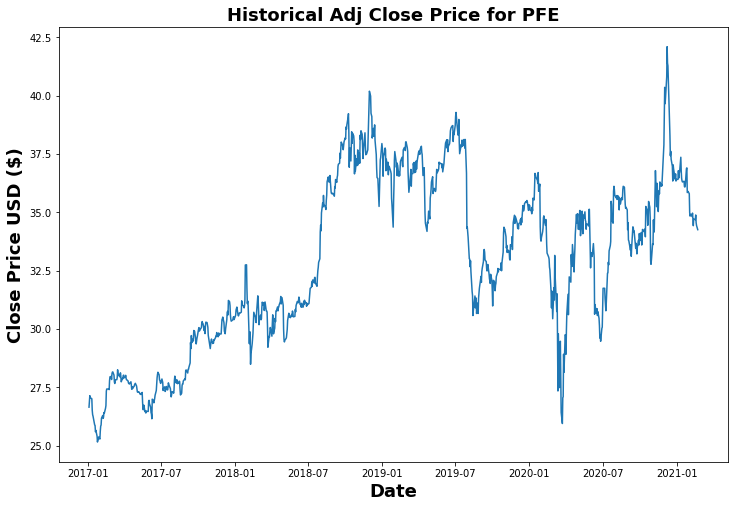

In [51]:
start='01-01-2019'
end='today'
pfe_stock = single_stock_data('PFE', start='01-01-2017',end='today',plot=True,stock_value='Adj Close')

In [52]:
#pfe_stock.to_csv('pfe_stock')
pfe_stock_data = pd.read_csv('pfe_stock', parse_dates=True, index_col='Date')
#single_stock['Close']['2015-04-01':'2015-12-01'].plot()
pfe_stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,31.309298,30.920303,31.024668,31.309298,23391844.0,26.653324
2017-01-04,31.641365,31.337761,31.432638,31.584440,22753963.0,26.887548
2017-01-05,31.963947,31.423149,31.660341,31.888046,21083584.0,27.146002
2017-01-06,31.973434,31.631880,31.935484,31.764706,18418228.0,27.041008
2017-01-09,31.944971,31.669828,31.717268,31.755219,21559886.0,27.032928
...,...,...,...,...,...,...
2021-02-12,34.950001,34.360001,34.439999,34.720001,25513100.0,34.720001
2021-02-16,34.860001,34.560001,34.849998,34.689999,28668400.0,34.689999
2021-02-17,35.000000,34.459999,34.570000,34.889999,26389400.0,34.889999


In [53]:
pfe_stock_data['Adj Close'].describe()

count    1040.000000
mean       32.850950
std         3.707581
min        25.159119
25%        29.999429
50%        33.001329
75%        36.119614
max        42.101986
Name: Adj Close, dtype: float64

## Technical Indicators
The pratice of analyzing and executing stock trades is becoming increasingly automated with algorithimic trading.  The usage of technnical indicators is part of algorithmic trading. What are technical indicators and how are used by Technical Analyst in stock trading?  Technical indicators are approaches or pattern-based signals produced by the price, volume, and/or open interest of a stock which are used by traders who follow technical analysis.  Technical analysts believe past trading activity and price changes of a security can be valuable indicators of the security's future price movements. https://www.investopedia.com/terms/t/technicalindicator.asp<br>Technical analysts look for indicators in the historical data and use them to predict future price movements.  The analysts also use them to look for entry and exit points in markets to conduct trades.  I will discuss the below popular technical indicators which are used in the markets to study price movements:

1. Moving Averages (MA)
    > Simple Moving Average<br>
    > Exponential Moving Average<br>
2. Rate of Change (ROC)

### Moving Averages
The moving average is also known as the rolling mean or running average.  Moving averages smooth out the curve by filtering out the noise inorder to highlight components in the data such as trends and seasonality.  The moving Average smooths out the variations in the dataset by calculating the moving average.  Three common types of moving averages are Simple Moving Average (SMA), Weighted Moving Average (WMA) and Exponential Moving Average (EMA).  Commonly time periods used for moving averages are 5, 10, 20, 50, 200 days.  A 10 time period SMA would generally would mean 10 trading days.<br>

#### Simple Moving Average
The Simple Moving Average is the arithmetic mean of all the stock prices or the sum of all the stock prices divided by the number of periods.  We can use the Python rolling method to calculate moving averages.<br>
<br>
The below plot shows a lot of fluctuations and noise in the stock price.  The plot shows the average stock price with the 10 and 20-year moving averages.<br>
Aound 2/18, there was a spike in price from \\$35.00 to \\$37.5 and then dropped quickly to almost $31.00.  What is the SMA showing us?  SMA is helpful in these instances because it gives a more realistic picture of what happened with stock the price. It may have increased and dropped quickly and e may not know what precipitated such activity, but what were the 10 and 20 day averages around this time period for a more accurate picute?<br>  We can see that with the 50 day rolling average and subset the stock's average price was \\$33.679641.
Around 8/2019, the price was pretty volatile.  The SMA smooths out the noise and gives a more accurate picture.<br>

In [54]:
rolling_method = pd.read_csv('pfe_stock', parse_dates=True, index_col='Date')
#how big should the subset of data be that we're calculating the moving average on?

In [55]:
def sma(data, col1=None,col2=None,col=None,roll1=None,roll2=None):
    data[col1] = data[col].rolling(10).mean()
    data[col2] = data[col].rolling(50).mean()

    return data#['2017-01-01':'2021-2-19']

In [56]:
sma_rolling = sma(rolling_method, col='Close',col1='MA_10',col2='MA_50',roll1=10,roll2=50)
sma_rolling

,High,Low,Open,Close,Volume,Adj Close,MA_10,MA_50
Date,,,,,,,,
2017-01-03,31.309298,30.920303,31.024668,31.309298,23391844.0,26.653324,NaN,NaN
2017-01-04,31.641365,31.337761,31.432638,31.584440,22753963.0,26.887548,NaN,NaN
2017-01-05,31.963947,31.423149,31.660341,31.888046,21083584.0,27.146002,NaN,NaN
2017-01-06,31.973434,31.631880,31.935484,31.764706,18418228.0,27.041008,NaN,NaN
2017-01-09,31.944971,31.669828,31.717268,31.755219,21559886.0,27.032928,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-02-12,34.950001,34.360001,34.439999,34.720001,25513100.0,34.720001,34.912,37.3150
2021-02-16,34.860001,34.560001,34.849998,34.689999,28668400.0,34.689999,34.801,37.1928
2021-02-17,35.000000,34.459999,34.570000,34.889999,26389400.0,34.889999,34.791,37.0888


In [57]:
sma_rolling['Close'].describe(), sma_rolling['MA_50'].describe()

(count    1040.000000
 mean       35.598118
 std         3.320764
 min        27.030361
 25%        33.377609
 50%        34.853586
 75%        37.945919
 max        43.861481
 Name: Close, dtype: float64,
 count    991.000000
 mean      35.706698
 std        2.998294
 min       31.284440
 25%       33.890418
 50%       34.772106
 75%       37.721625
 max       41.757495
 Name: MA_50, dtype: float64)

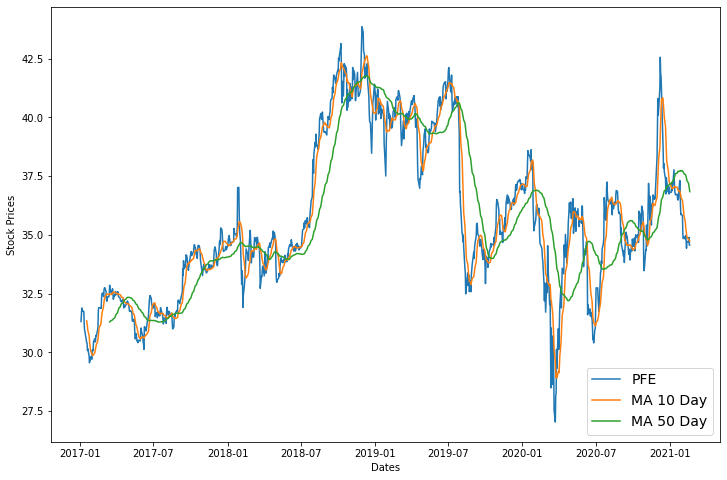

In [58]:
plt.figure(figsize=(12,8))
plt.plot(sma_rolling['Close'], label='PFE')
plt.plot(sma_rolling['MA_10'], label='MA 10 Day')
plt.plot(sma_rolling['MA_50'],label='MA 50 Day')
plt.xlabel('Dates')
plt.ylabel('Stock Prices')
plt.legend(loc='lower right', fontsize=14)

In [59]:
rolling_50_sub = rolling_method['MA_50']['2017-09-01':'2018-4-01']
rolling_50_sub.describe()

count    144.000000
mean      33.679641
std        0.912249
min       31.659583
25%       33.190323
50%       33.975712
75%       34.453748
max       34.675522
Name: MA_50, dtype: float64

#### Exponential Moving Average (EMA)
 The EMA is also referred to as the exponentially weighted moving average.  The difference between EMA and SMA is that SMA assigns equal weight to all periods.  Whereas, with EMA the latest prices are given higher weights and it assigns lesser weight to past data.  EMA is used more by short term traders because it is quicker to react to price changes compared to SMA which is slower. This technical indicator is used to produce buy and sell signals based on crossovers and divergences from the historical price average.  https://www.investopedia.com/terms/e/ema.asp
 <br>
When red line crosses above the green line you see a increase in the price and every time the red drops below the EMA26 you see the price decrease.

In [60]:
pfe_df = pfe_stock_data.copy()

In [61]:
# #single_stock
# #good time of when to buy stockand when to sell it
# #three moving avrages
# #short/fast exponential moving ma
def create_ema_function(data, col='Close',span1=None,span2=None,span3=None):
    data['shortEMA'] = data[col].ewm(span=span1, adjust=False).mean() #5 time periods
    #calculate middle/medium exponential moving ma
    data['middleEMA'] = data[col].ewm(span=span2, adjust=False).mean() #5 time periods
    #calculate long/slow exponential moving ma
    data['longEMA'] = data[col].ewm(span=span3, adjust=False).mean() #5 time periods
    
    #visulaize closing price and exponential moving average
    plt.figure(figsize=(12,6))
    plt.plot(data[col],label='Close Price', color='blue')
    plt.plot(data['shortEMA'],label='Short/Fast EMA', color='red')
    plt.plot(data['middleEMA'],label='Middle/medium EMA', color='orange')
    plt.plot(data['longEMA'],label='Long/slow EMA', color='green')
    plt.title('Exponential Moviing Average Plot')
    plt.xlabel('Dates')
    plt.ylabel('Closing Price')
    plt.legend()
    
    return data #, shortEMA, middleEMA,longEMA

,High,Low,Open,Close,Volume,Adj Close,shortEMA,middleEMA,longEMA
Date,,,,,,,,,
2017-01-03,31.309298,30.920303,31.024668,31.309298,23391844.0,26.653324,31.309298,31.309298,31.309298
2017-01-04,31.641365,31.337761,31.432638,31.584440,22753963.0,26.887548,31.401012,31.334311,31.317896
2017-01-05,31.963947,31.423149,31.660341,31.888046,21083584.0,27.146002,31.563357,31.384650,31.335713
2017-01-06,31.973434,31.631880,31.935484,31.764706,18418228.0,27.041008,31.630473,31.419201,31.349119
2017-01-09,31.944971,31.669828,31.717268,31.755219,21559886.0,27.032928,31.672055,31.449748,31.361810


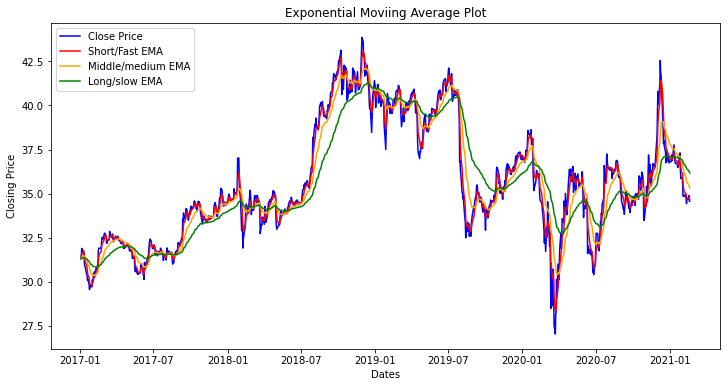

In [62]:
ewma1 = create_ema_function(data=pfe_df, span1=5, span2=21,span3=63)
ewma1.head()

#### Exponential Moving Average Crossover Stratergy
Stock market analysts and investors use Exponential Moving Average Crossover strategy, among other moving averages, to analyse price trends and predict upcoming change of trends.  A moving-average crossover occurs when plotting, the two moving averages each based on different time-periods tend to cross. This indicator uses two (or more) moving averages — a faster moving average(short-term) and a slower(long-term) moving average. The faster moving average may be 5-, 10- or 25-day period while the slower moving average can be 50-, 100- or 200-day period.  A short term moving average is faster because it only considers prices over short period of time and is thus more reactive to daily price changes. On the other hand, a long-term moving average is deemed slower as it encapsulates prices over a longer period and is more lethargic.<br>
A crossover occurs when a faster moving average (i.e. a shorter period moving average) crosses a slower moving average (i.e. a longer period moving average). In stock trading, this meeting point can be used as a potential indicator to buy or sell an asset.
When the short term moving average crosses above the long term moving average, this indicates a buy signal.
However, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.<br>

In [63]:
#function to buy and sell the stock
#buy sell signals
def buy_sell_function(data):
    buy_list = []
    sell_list=[]
    flag_long = False
    flag_short = False

    for i in range(0, len(data)):
        if data['middleEMA'][i] < data['longEMA'][i] and data['shortEMA'][i]< data['middleEMA'][i] and flag_long== False and flag_short== False:
                #this is when to buy stock
                buy_list.append(data['Close'][i])
                sell_list.append(np.nan)
                flag_short = True
        #sell if the short/fast moving average crosses above the middle moving average
        elif flag_short == True and data['shortEMA'][i] > data['middleEMA'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['middleEMA'][i] > data['longEMA'][i] and data['shortEMA'][i]> data['middleEMA'][i] and flag_long== False and flag_short== False:
                #this is when to buy stock
                buy_list.append(data['Close'][i])
                sell_list.append(np.nan)
                flag_long = True
        #sell if the short/fast moving average crosses above the middle moving average
        elif flag_long == True and data['shortEMA'][i] < data['middleEMA'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False 
        else:
            #if conditions not met for any statement just append to buy, sell lists a nan value
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
           
    return buy_list, sell_list       
            

In [64]:
#add buy and sell signals to dataset
ewma1['Buy'] = buy_sell_function(pfe_df)[0] #return index 0
ewma1['Sell'] = buy_sell_function(pfe_df)[1] #return inddex 1

In [65]:
def ema_signals_function(data):
    plt.figure(figsize=(12,8))
    plt.plot(data['Close'],label='Close Price', color='blue',alpha=0.35)
    plt.plot(data['shortEMA'],label='Short/Fast EMA', color='red',alpha=0.35)
    plt.plot(data['middleEMA'],label='Middle/medium EMA', color='orange',alpha=0.35)
    plt.plot(data['longEMA'],label='Long/slow EMA', color='green',alpha=0.35)
    plt.scatter(data.index,data['Buy'], color='green', marker='^', alpha=1)
    #prices are going to go down
    plt.scatter(data.index,data['Sell'], color='red',marker='v',alpha=1)
    plt.title('Buy and Sell Graph')
    plt.legend() 

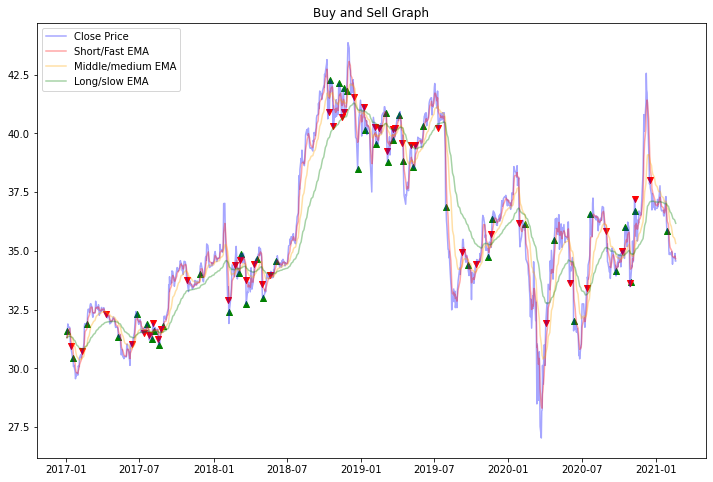

In [66]:
ema_signals_function(data=ewma1)

### Rate of Change
The Rate of Change (ROC) is a technical indicator that measures the percentage change between the most recent price and the price "n" day’s ago. The indicator fluctuates around the zero line.
#### Historical Price Change Analysis
Volatility is the range of price changes a security experiences over a given period of time. If the price stays relatively stable, the security has low volatility. A highly volatile security hits new highs and lows quickly, moves erratically, and has rapid increases and dramatic falls.  Is volatility in price good or bad for trading? This is a complex question with multiple possible answer.  One possible answer is that as the price fluctuates, it provides the opportunity for investors to buy stock in a solid company when the price is very low, and then wait for cumulative growth down the road.https://www.investopedia.com/ask/answers/010915/volatility-good-thing-or-bad-thing-investors-point-view-and-why.asp<br>
For short-term traders, volatility is even more crucial. Day traders work with changes that occur second-to-second, minute-to-minute. If there is no price change, there is no profit.https://www.investopedia.com/ask/answers/010915/volatility-good-thing-or-bad-thing-investors-point-view-and-why.asp THe column 'change' shows how volatile the price change percentage wise. The graph shows that the data points are now centered aound 0. The graph shows that around 3/20 was a volatile period for the stock price and it increase above 7% and decreased 7%.



### Price Change in Dollars
Add column to calculate actual change in dollars<br>
To see how big the changes were on a daily basis we subtract yesterday's closing price yesterday from today.  This will show the change in price.  For example, we can see that on 1/3 the Closing price was 39.886147 and on 1/2 the Closing price was 41.034157 so the price decreased -$1.148.<br> 
Expected change (1 std deviaiton movement in price)<br>
Column of calculation of how big the actual changes was interms of standard deviations.<br>
Histograms changes in standard deviaiton<br>
Scatterplot of absolute value of magnitude change vs. actual change. Let's us see how the price changes daily.<br>

In [67]:
# sdr = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2017',end='today',plot=False, stock_value='Adj Close')
# sdr
price_change = pfe_stock_data.copy()

In [68]:
#leavr off 1 b/c that's default value
#using shift function
#price decreased by -$1.148

price_change['Actual_Changes'] = price_change['Close'] - price_change['Close'].shift(1)
# price_change['Expected_Changes'] =price_change['Close'] * #std deviation or 21 day 
price_change

,High,Low,Open,Close,Volume,Adj Close,Actual_Changes
Date,,,,,,,
2017-01-03,31.309298,30.920303,31.024668,31.309298,23391844.0,26.653324,NaN
2017-01-04,31.641365,31.337761,31.432638,31.584440,22753963.0,26.887548,0.275143
2017-01-05,31.963947,31.423149,31.660341,31.888046,21083584.0,27.146002,0.303606
2017-01-06,31.973434,31.631880,31.935484,31.764706,18418228.0,27.041008,-0.123341
2017-01-09,31.944971,31.669828,31.717268,31.755219,21559886.0,27.032928,-0.009487
...,...,...,...,...,...,...,...
2021-02-12,34.950001,34.360001,34.439999,34.720001,25513100.0,34.720001,0.290001
2021-02-16,34.860001,34.560001,34.849998,34.689999,28668400.0,34.689999,-0.030003
2021-02-17,35.000000,34.459999,34.570000,34.889999,26389400.0,34.889999,0.200001


The below graph shows that for the stated time the stock price never increased more than 3.00 and did not decrease more than -3.00.<br>

In [69]:
#the mean (average) change was less than 1 cent
price_change['Actual_Changes'].describe() 

count    1039.000000
mean        0.003138
std         0.508999
min        -2.590134
25%        -0.203985
50%         0.009487
75%         0.237190
max         2.656548
Name: Actual_Changes, dtype: float64

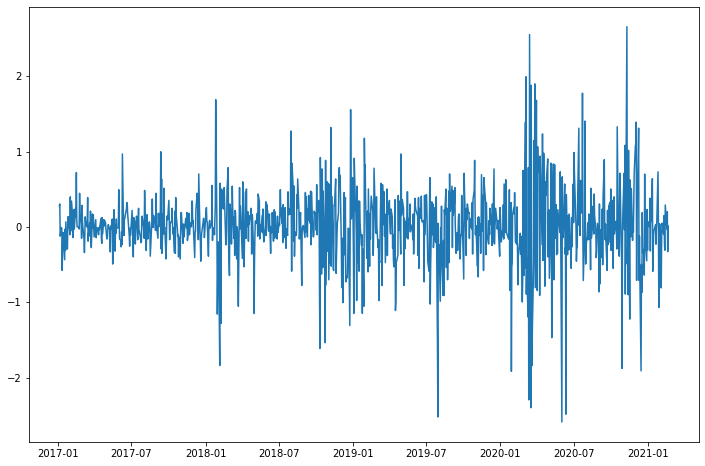

In [70]:
plt.figure(figsize=(12,8))
plt.plot(price_change['Actual_Changes'])

In [71]:
multi_stocks

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.653324,104.081535,25.400000,NaN,23.886580,NaN
2017-01-04,26.887548,103.910828,26.200001,NaN,24.076221,NaN
2017-01-05,27.146002,104.998009,26.400000,NaN,24.731359,NaN
2017-01-06,27.041008,104.494850,27.400000,NaN,24.507233,NaN
2017-01-09,27.032928,104.476868,28.400000,NaN,24.593435,NaN
...,...,...,...,...,...,...
2021-02-08,34.820000,164.919998,319.929993,185.979996,50.060001,119.500000
2021-02-09,34.970001,166.270004,315.869995,179.520004,50.410000,117.529999
2021-02-10,34.740002,166.809998,298.359985,179.339996,49.970001,119.349998


In [72]:
multi_price_change = multi_stocks.copy()

In [73]:
multi_price_change = multi_price_change - multi_price_change.shift(1)

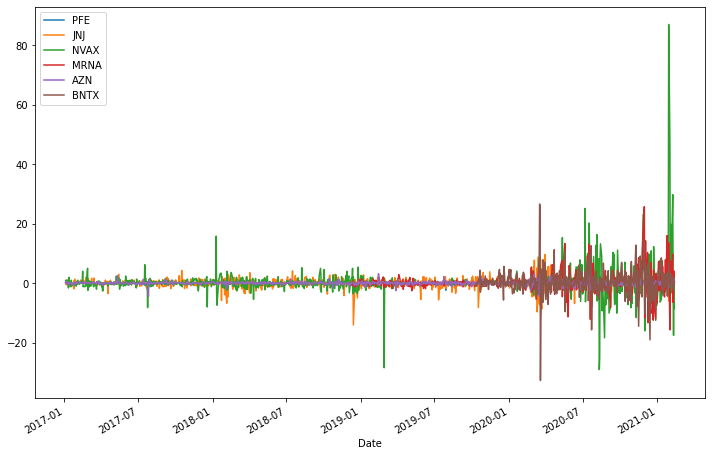

In [74]:
#plt.figure()
multi_price_change.plot(figsize=(12,8))

In [76]:
multi_price_change.describe()

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
count,1035.000000,1035.000000,1035.000000,549.000000,1035.000000,338.000000
mean,0.007794,0.060385,0.255420,0.300801,0.026863,0.305680
std,0.478969,1.736645,4.734977,3.379358,0.692843,4.712680
min,-2.511635,-14.051132,-29.029999,-15.680008,-4.506506,-32.700001
25%,-0.177513,-0.568031,-0.600000,-0.660000,-0.244589,-1.787500
50%,0.008781,0.084106,0.000000,0.030000,0.029762,0.130001
75%,0.215986,0.801105,0.620000,0.969994,0.310330,2.337501
max,2.627960,9.650452,86.930008,25.710007,3.988117,26.599998


### Simple Daily Return
Daily price change as a percentage

In [85]:
multi_pharma_stocks.head()

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.653324,104.081535,25.400000,NaN,23.886580,NaN
2017-01-04,26.887548,103.910828,26.200001,NaN,24.076221,NaN
2017-01-05,27.146002,104.998009,26.400000,NaN,24.731359,NaN
2017-01-06,27.041008,104.494850,27.400000,NaN,24.507233,NaN
2017-01-09,27.032928,104.476868,28.400000,NaN,24.593435,NaN


In [86]:
(26.200001 /25.400000) -1

0.0314961023622049

In [32]:
#clculate simple daily return for each day for each stock
#new price(cuurent time period) /old price - 1
#26.887548 - 26.653324=
daily_simple_returns = multi_stocks.pct_change(1) #1 is for 1 day
daily_simple_returns

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008788,-0.001640,0.031496,NaN,0.007939,NaN
2017-01-05,0.009612,0.010463,0.007634,NaN,0.027211,NaN
2017-01-06,-0.003868,-0.004792,0.037879,NaN,-0.009062,NaN
2017-01-09,-0.000299,-0.000172,0.036496,NaN,0.003517,NaN
...,...,...,...,...,...,...
2021-02-08,-0.002864,0.002858,0.102523,0.055265,0.006636,0.016416
2021-02-09,0.004308,0.008186,-0.012690,-0.034735,0.006992,-0.016485
2021-02-10,-0.006577,0.003248,-0.055434,-0.001003,-0.008728,0.015485


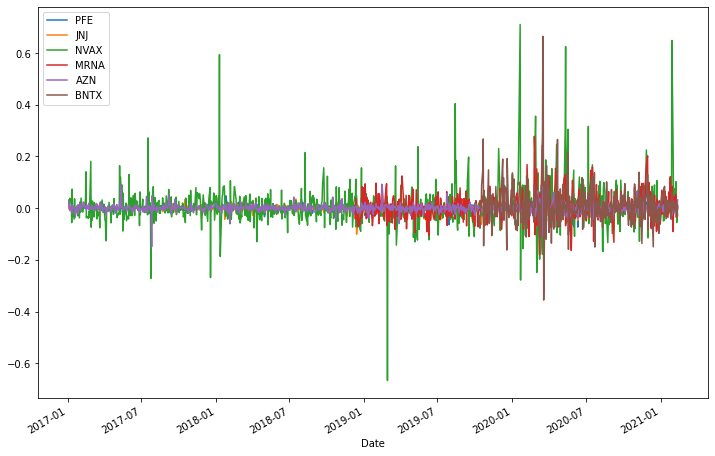

In [83]:
daily_simple_returns.plot(figsize=(12,8))

In [33]:
36.551258 - 37.603287

-1.0520290000000045

In [82]:
#0.008750
single_sdr = pfe_stock_data.copy()


daily_simple_returns_1 = single_sdr['Adj Close'].pct_change(1) #1 is for 1 day
daily_simple_returns_1

Date
2017-01-03         NaN
2017-01-04    0.008788
2017-01-05    0.009612
2017-01-06   -0.003868
2017-01-09   -0.000299
                ...   
2021-02-12    0.008423
2021-02-16   -0.000864
2021-02-17    0.005765
2021-02-18   -0.009458
2021-02-19    0.000289
Name: Adj Close, Length: 1040, dtype: float64

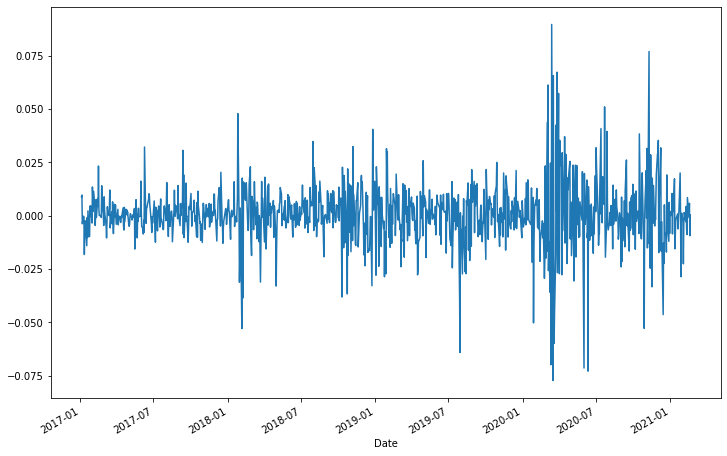

In [81]:
plt.figure(figsize=(12,8))
daily_simple_returns_1.plot()

In [87]:
#stock volatility
#print standard deviaiton for daily simple return
#volatility is standard deviation
#Most volatile stock is NVAX, least volatile stock is JNJ
#the higher the volaitility the higher hte return, the lower volatility the lower return
#expect a lower return for JNJ as opposed to BNTX
print('The Stock Volatility')
daily_simple_returns.std()

The Stock Volatility


PFE     0.014510
JNJ     0.013315
NVAX    0.077109
MRNA    0.052318
AZN     0.016494
BNTX    0.079720
dtype: float64

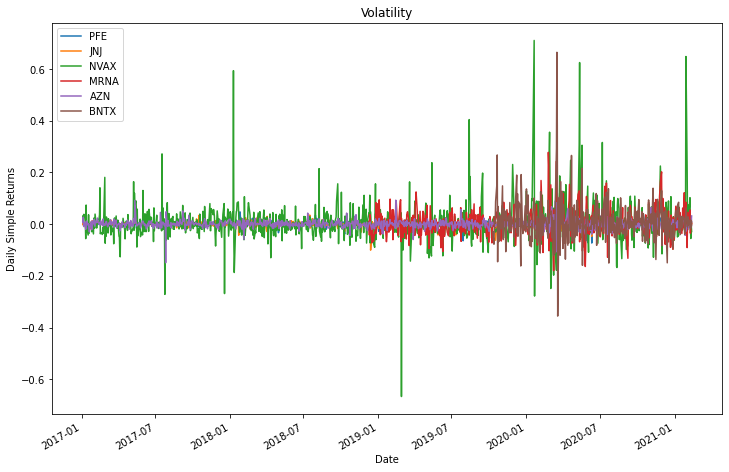

In [88]:
#vislauize stocks simple daily returns/Volaitilty
#NVAX and BNTX are very volatile
#AZN is right in the middle and not that voaltile
daily_simple_returns.plot(figsize=(12,8));
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.legend()

In [89]:
#mean of daily simple return
#highest return should be NBTX and lowest for PFE
mean_dsr = daily_simple_returns.mean()
print('The Daily Mean Simple Return')
mean_dsr

The Daily Mean Simple Return


PFE     0.000361
JNJ     0.000543
NVAX    0.005230
MRNA    0.005511
AZN     0.000883
BNTX    0.009217
dtype: float64

In [93]:
#calculate historical volatility
prct_change = price_change.copy()
prct_change['change'] = np.log(prct_change['Close'] / prct_change['Close'].shift()) #divide by previous days close

In [94]:
prct_change

,High,Low,Open,Close,Volume,Adj Close,Actual_Changes,change
Date,,,,,,,,
2017-01-03,31.309298,30.920303,31.024668,31.309298,23391844.0,26.653324,NaN,NaN
2017-01-04,31.641365,31.337761,31.432638,31.584440,22753963.0,26.887548,0.275143,0.008750
2017-01-05,31.963947,31.423149,31.660341,31.888046,21083584.0,27.146002,0.303606,0.009567
2017-01-06,31.973434,31.631880,31.935484,31.764706,18418228.0,27.041008,-0.123341,-0.003875
2017-01-09,31.944971,31.669828,31.717268,31.755219,21559886.0,27.032928,-0.009487,-0.000299
...,...,...,...,...,...,...,...,...
2021-02-12,34.950001,34.360001,34.439999,34.720001,25513100.0,34.720001,0.290001,0.008388
2021-02-16,34.860001,34.560001,34.849998,34.689999,28668400.0,34.689999,-0.030003,-0.000865
2021-02-17,35.000000,34.459999,34.570000,34.889999,26389400.0,34.889999,0.200001,0.005749


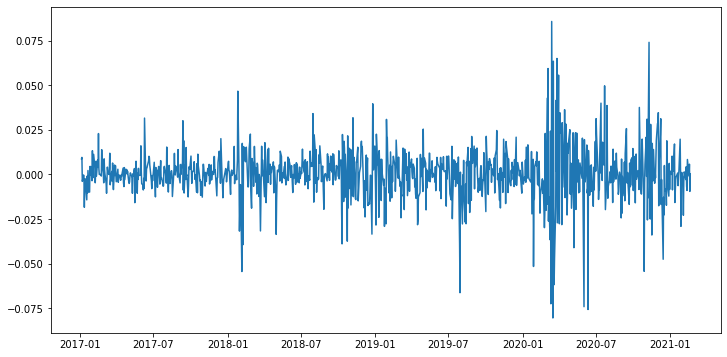

In [92]:
#graph centered around 0
#price only went up 7% twice and around 3/20 went down below 7% a few times
#8/19 went below &%
plt.figure(figsize=(12,6))
plt.plot(prct_change['change'])

### Historical Volatility

In [ ]:
#use  rolling standard deviation to get that 
#use 21 day rolling window b/c there are 21 traing days in a month on average
#this will include 21st observation
#but volatility should be used from next day
prct_change['Volatility'] = prct_change['change'].rolling(21).std().shift(1)

In [ ]:
#what price volatility looks like over time
#4/20 was a highly volatile period
prct_change['Volatility'].plot()

In [ ]:
#use rolling standard deviation to ge that. Use 21 day rolling window.
#use today's volatility at close today to predcit a 1 std move tomorrow
prct_change['Expected_Change'] = prct_change['Close'].shift(1) * prct_change['Volatility'] #1 std or 21 day rolling std
prct_change = prct_change.iloc[1:]
prct_change

In [ ]:
#magnitude of change
#divide actual change by expected change
#end up w/values in standard deviations
prct_change['Magnitude'] = prct_change['Actual_Changes'] / prct_change['Expected_Change']

In [ ]:
#idea of typical distrubution of changes in terms of standard deviation
#mostly w/in 3 stadnard deviaitons of mean
#could be more of positve change
#kind of equal happening on positve and negative side
plt.hist(prct_change['Magnitude'], bins='auto')

In [ ]:

sdr = multi_stocks.pct_change(1)
sdr

In [ ]:
(26.887548/26.653324) - 1

In [ ]:
# #visualize stocks daily returns
# plt.figure(figsize=(12,6))
# #loop through each stock and plot simple returns
# for c in d_simple_returns.columns.values:
#     plt.plot(d_simple_returns.index, d_simple_returns[c], label=c)
# #plt.title(title)
# #plt.ylabel(col + ' Price', fontsize=18)
# plt.legend(loc='upper left', fontsize=10)
# plt.title('Volatility')
# plt.xlabel('Date')
# plt.ylabel('Daily Simple Returns')

## Question 2: How well can historical data and algorithms predict future stocks prices? 
This section focuses on using Long Short Term Memory (LSTM) and SARIMA models to predict future stock prices.

### LTSM Models and LTSM Models with Technical Indicators.



In [ ]:
#start='01-01-2019',end='today',
#df_single = single_stock_data('PFE', start='01-01-2019',end='today',plot=True,stock_value='Adj Close')

In [ ]:
#df_single.to_csv('single_stock')
single = pd.read_csv('single_stock', parse_dates=True, index_col='Date')
single

In [ ]:
(24.905140 / 25.028662) -1

### LTSM With technical Indicators

In [ ]:
# def delta_time_series(data,col=None):
#     data['Percent_Chg'] = data[col].pct_change(1)
    
#     #data_1 = data_1.rename(columns={"Adj Close": "Percent_Chg"})
#     #return data[1:]- data[:-1]
#     data = data.dropna()
#     return data

In [ ]:
def delta_time_series(data,col=None):
    data['Percent_Chg'] = data[col].pct_change(1)
    data['MA_50'] = data[col].rolling(50).mean()
    data = data.dropna()
    return data

In [ ]:
df_chnge = delta_time_series(single, col='Adj Close')
df_chnge

In [ ]:
df_chnge.shape

In [ ]:
def plot_delta(data,col=None,symbol=None):
    plt.figure(figsize=(12,6))
    #plt.plot(delta_time_series(data))
    plt.plot(data[col])
    label_font = {'weight':'bold','size':18}
    plt.title('Daily Percentage Price Change',fontdict=label_font)
    plt.xlabel('Dates',fontdict=label_font)
    plt.ylabel('close')
    plt.show()

In [ ]:
#simple daily return
#centered aroun d 0
plot_delta(df_chnge, col='Percent_Chg')

In [ ]:
# def get_y_from_generator(gen):
#     '''
#     Get all targets y from a TimeseriesGenerator instance.
#     '''
#     y = None
#     for i in range(len(gen)):
#         batch_y = gen[i][1]
#         if y is None:
#             y = batch_y
#         else:
#             y = np.append(y, batch_y)
#     y = y.reshape((-1,1))
#     print(y.shape)
#     return y

In [ ]:
def get_y_from_df(train_scaled_df, look_back, col='Adj Close', ):
    y = train_scaled_df[col].iloc[look_back: ]
    return y

In [ ]:
# def binary_accuracy(a, b):
#     '''
#     Helper function to compute the match score of two 
#     binary numpy arrays.
#     '''
#     assert len(a) == len(b)
#     return (a == b).sum() / len(a)

In [ ]:
df_chnge

In [ ]:
single_stock = df_chnge.copy()

In [ ]:
single_stock

#### Train Test Split

In [ ]:
train_size = int(len(single_stock) * 0.80)#0.67
test_size = len(single_stock) - train_size
#val_size = len(dataset_delta_AMAZN)  - 

In [ ]:
single_stock.index[train_size]

In [ ]:
single_stock.index[-test_size]


In [ ]:
train = single_stock[:'2020-09-11']
val = single_stock['2020-09-11':'2020-11-01']
test = single_stock['2020-11-01':] #2021-02-12
ax = train.plot()
val.plot(ax=ax)
test.plot(ax=ax)

In [ ]:
def train_test_val(single_stock, date1='2020-09-11', date2='2020-11-01'):    
    train = single_stock[:date1]#'2020-09-11'
    val = single_stock[date1:date2]
    test = single_stock[date2:] #2021-02-12
    ax = train.plot()
    val.plot(ax=ax)
    test.plot(ax=ax)
    
    return train, val, test

In [ ]:
train, val, test= train_test_val(single_stock)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
val_scaled = scaler.transform(val)

In [ ]:
train_scaled_df = pd.DataFrame(train_scaled, columns=train.columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test.columns, index=test.index)
val_scaled_df = pd.DataFrame(val_scaled, columns=val.columns, index=val.index)


In [ ]:
train_scaled_df.shape, val_scaled_df.shape, test_scaled_df.shape

In [ ]:
look_back = 3
batch_size=3
col_index = {v:k for k,v in enumerate(train_scaled_df.columns)}
col_index

In [ ]:
train_scaled_df.columns

In [ ]:
col_index['Adj Close']


In [ ]:
train_data_gen = TimeseriesGenerator(train_scaled_df.values, train_scaled_df['Adj Close'].values,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=batch_size)

In [ ]:
val_data_gen = TimeseriesGenerator(val_scaled_df.values, val_scaled_df['Adj Close'].values,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=batch_size)

In [ ]:
test_data_gen = TimeseriesGenerator(test_scaled_df.values, test_scaled_df['Adj Close'].values,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [ ]:
ex_X, ex_y = train_data_gen[0]
ex_X.shape

In [ ]:
sample = ex_X[0]
sample.shape

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=sample.shape))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()    

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=True)
# hist = model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop],validation_split=0.1)     
hist = model.fit_generator(train_data_gen, epochs=25,validation_data=val_data_gen,callbacks=[early_stop])

In [ ]:
model.evaluate_generator(test_data_gen)

In [ ]:
pd.DataFrame(hist.history).plot()

In [ ]:
def save_model(model):
    model.save('model_parameters')
    model_params = keras.models.load_model('model_parameters')
    model_params.summary()

    return model_params

In [ ]:
model_params = save_model(model)

In [ ]:
trainPredict = model.predict_generator(train_data_gen)
trainPredict.shape

In [ ]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

In [ ]:
testPredict

In [ ]:
trainPredict.shape

In [ ]:
y_hat_train = pd.Series(trainPredict.flatten(),index=train.index[look_back:])
len(y_hat_train)

In [ ]:
y_hat_train.plot()

In [ ]:
#y_hat_train = pd.Series(testPredict.
y_hat_test = pd.Series(testPredict.flatten(),index=test.index[look_back:])
len(y_hat_test)

In [ ]:
y_train = get_y_from_df(train_scaled_df,look_back)
y_test = get_y_from_df(test_scaled_df,look_back)
y_train = get_y_from_df(train_scaled_df,look_back)
y_val = get_y_from_df(val_scaled_df,look_back)

In [ ]:
def model_metrics(y_train,y_hat_train):
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_hat_train))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(y_test, y_hat_test))
    print('Test Score: %.2f RMSE' % (testScore))
    
    return trainScore, testScore

In [ ]:
model_metrics(y_train,y_hat_train)

In [ ]:
plt.figure(figsize=(12,6))
y_train.plot(label='train')
y_test.plot(label='test')
y_val.plot(label='val')
y_hat_test.plot(label='Prediction')
#lt.legend(['Valid','Train','Predictions'],loc='uppper left')
plt.legend()

### LTSM and Technical Indicators

#### Percent_Chg

In [ ]:
train_scaled_df.columns

In [ ]:
col_index['Percent_Chg']

In [ ]:
def generator_function(train_scaled_df, val_scaled_df, test_scaled_df, col=None):
    train_data_gen = TimeseriesGenerator(train_scaled_df.values, train_scaled_df[col].values,
                                   length=look_back, sampling_rate=1,stride=1,
                                   batch_size=batch_size)

    val_data_gen = TimeseriesGenerator(val_scaled_df.values, val_scaled_df[col].values,
                                   length=look_back, sampling_rate=1,stride=1,
                                   batch_size=batch_size)

    test_data_gen = TimeseriesGenerator(test_scaled_df.values, test_scaled_df[col].values,
                                   length=look_back, sampling_rate=1,stride=1,
                                   batch_size=3)
    
    ex_X, ex_y = train_data_gen[0]
    #ex_X.shape
    
    return train_data_gen,val_data_gen,test_data_gen, ex_X,ex_y

In [ ]:
train_data_gen,val_data_gen,test_data_gen, ex_X,ex_y = generator_function(train_scaled_df, val_scaled_df,
                                                               test_scaled_df, col='Percent_Chg')

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=sample.shape))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()    

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=True)
# hist = model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop],validation_split=0.1)     
hist = model.fit_generator(train_data_gen, epochs=50,validation_data=val_data_gen,callbacks=[early_stop])

In [ ]:
pd.DataFrame(hist.history).plot()

In [ ]:
def get_y_from_df(train_scaled_df, look_back, col='Percent_Chg'):
    y = train_scaled_df[col].iloc[look_back: ]
    return y

In [ ]:
trainPredict = model.predict_generator(train_data_gen)
#trainPredict.shape
testPredict = model.predict_generator(test_data_gen)
#testPredict.shape
y_hat_train = pd.Series(trainPredict.flatten(),index=train.index[look_back:])
y_hat_test = pd.Series(testPredict.flatten(),index=test.index[look_back:])

y_train = get_y_from_df(train_scaled_df,look_back)
y_test = get_y_from_df(test_scaled_df,look_back)
y_train = get_y_from_df(train_scaled_df,look_back)
y_val = get_y_from_df(val_scaled_df,look_back)

In [ ]:
model_metrics(y_train,y_hat_train)

In [ ]:
plt.figure(figsize=(12,6))
y_train.plot(label='train')
y_test.plot(label='test')
y_val.plot(label='val')
y_hat_test.plot(label='Prediction')
#lt.legend(['Valid','Train','Predictions'],loc='uppper left')
plt.legend()

In [ ]:
def get_quote(new_df):
    #get last 60days closing values and convert datframe to an array
    last_60_days = new_df[-60:].values #converts to array
    #scale data
    last_60_days_scaled = scaler.transform(last_60_days)
    #create empty list
    x_test = []
    #append last 60 days to x_test
    x_test.append(last_60_days_scaled)
    #conert x_test to a numpy array
    x_test = np.array(x_test)
    # #reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    pred_price = model.predict(x_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price) 
    #what model thinks predicted price will be for 12/18/2019
    #the actual prcie was $69.94
    #DAL: 58.58, 2021-1-11 40.19
    return pred_price    

In [ ]:
#get_quote(single_stock[['Adj Close']])

### Multi-Series Forecasting

In [ ]:
# dataset_x = np.concatenate((dataset_delta_DJI, dataset_delta_APPL, dataset_delta_AMAZN), axis = 1)
# dataset_y = dataset_delta_DJI

dataset_x = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN']], start='12-31-2018',end='today',plot=True, stock_value='Adj Close');
dataset_y = dataset_x['PFE']

In [ ]:
dataset_x.shape, dataset_y.shape

### Multi Train Test Split

In [ ]:
# # split into train and test sets
# train_size = int(len(dataset_x) * 0.67)
# test_size = len(dataset_x) - train_size
# train_x, test_x = dataset_x[0:train_size,:], dataset_x[train_size:len(dataset_x),:]
# train_y, test_y = dataset_y[0:train_size,:], dataset_y[train_size:len(dataset_y),:]

x_train_size = int(len(dataset_x) * 0.80)#0.67
x_test_size = len(dataset_x) - x_train_size
y_train_size = int(len(dataset_y) * 0.80)#0.67
y_test_size = len(dataset_y) - y_train_size

In [ ]:
x_train_size, x_test_size, y_train_size, y_test_size

In [ ]:
dataset_x.index[train_size]

In [ ]:
dataset_x.index[-test_size]

In [ ]:
x_train = dataset_x[:'2020-09-16']
x_val = dataset_x['2020-09-16':'2020-11-16']
x_test = dataset_x['2020-11-16':] #2021-02-12
# ax = train.plot()
# val.plot(ax=ax)
# test.plot(ax=ax)
plt.figure(figsize=(12,8))
plt.plot(x_train)
plt.plot(x_val)
plt.plot(x_test);

In [ ]:
y_train = dataset_y[:'2020-09-16']
y_val = dataset_y['2020-09-16':'2020-11-16']
y_test = dataset_y['2020-11-16':] #2021-02-12
plt.figure(figsize=(12,8))
plt.plot(y_train)
plt.plot(y_val)
plt.plot(y_test);

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

In [ ]:
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1,1))
y_val_scaled = scaler.transform(y_val.values.reshape(-1,1))

In [ ]:
x_train_scaled.shape,y_train_scaled.shape, x_test_scaled.shape, y_test_scaled.shape

In [ ]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)
x_val_scaled_df = pd.DataFrame(x_val_scaled, columns=x_val.columns, index=x_val.index)

y_train_scaled_df = pd.DataFrame(y_train_scaled, index=y_train.index)
y_test_scaled_df = pd.DataFrame(y_test_scaled, index=y_test.index)
y_val_scaled_df = pd.DataFrame(y_val_scaled, index=y_val.index)



In [ ]:
look_back = 5

In [ ]:
train_data_gen1 = TimeseriesGenerator(x_train_scaled_df,y_train_scaled_df,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [ ]:
val_data_gen1 = TimeseriesGenerator(x_val_scaled_df, y_val_scaled_df,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [ ]:
test_data_gen1 = TimeseriesGenerator(x_test_scaled_df, y_test_scaled_df,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [ ]:
model1 = Sequential()

model1.add(LSTM(units = 50, return_sequences = True, input_shape=sample.shape))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, return_sequences = False))
model1.add(Dropout(0.2))

model1.add(Dense(units = 25))
model1.add(Dense(units = 1))

model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

model1.summary()    

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=True)
# hist = model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop],validation_split=0.1)     
hist = model1.fit_generator(train_data_gen1, epochs=25,validation_data=val_data_gen1,callbacks=[early_stop])